<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

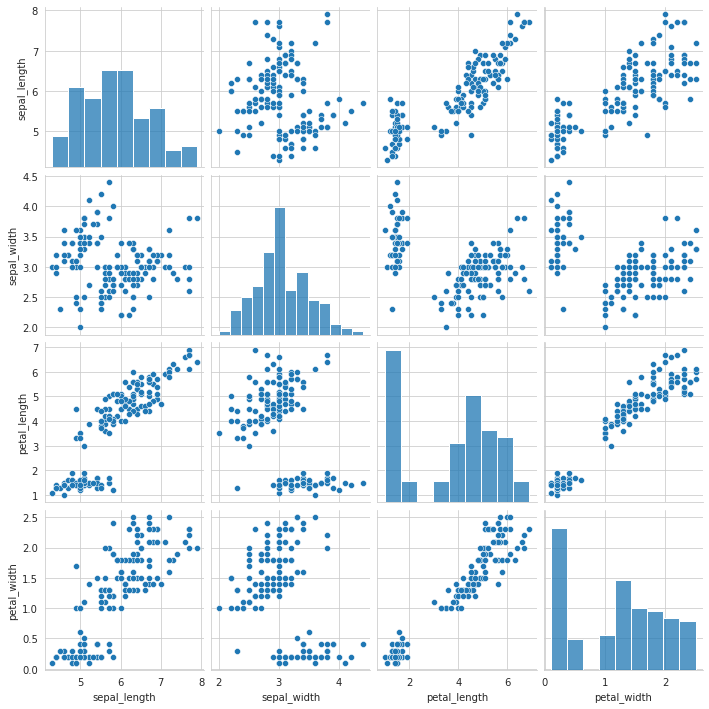

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Observando o gráfico acima, é possível extrair as seguintes informações:

* Em uma visão superficial, fica subentendido que existem dois 
conjuntos de informações distintas, conforme a dispersão dos pontos em relação aos seus eixos.
* Se observado os dados com mais atenção em relação aos seus eixos, é possível retificar a observação superficial. Visto que, na relação do comprimento e largura da pétala, é visível que existe um grupo de íris que possuem tamanho de pétalas pequenas e outro com tamanho de pétalas maiores. Outra observação que retífica essa informação é a relação do comprimento da pétala em comparação ao comprimento da sépala, fica visível também a existem de dois conjuntos, onde o primeiro possui comprimento de pétala pequeno e comprimento de sépala pequena-mediana, e o segundo conjunto com comprimento de pétala mediana-grande e comprimento de sépala mediana-grande. Somando a essa informação, existe a relação do comprimento e largura da sépala, que também subdivide os pontos em dois conjuntos, sendo o primeiro de íris com sépalas de largura média-grande e comprimento pequena-média, e o segundo conjunto de íris com largura de pequena e comprimento média-grande. 


## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [5]:
# resposta da questão 2.1

# Consultando se existem valores nulos no DataFrame:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### **2.2. Variáveis numéricas** 

**Identifique se existe a necessidade** de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [6]:
# resposta da questão 2.2

# Não existe a necessidade de escalar as variáveis numéricas, pois ela se estão muito próximas da média.

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [7]:
# resposta da questão 2.3

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [8]:
# resposta da questão 3.1

# lista de valores wcss:
wcss = list()

# Loop para treinar os modelos:
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model = model.fit(iris)
  wcss.append(model.inertia_)




### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

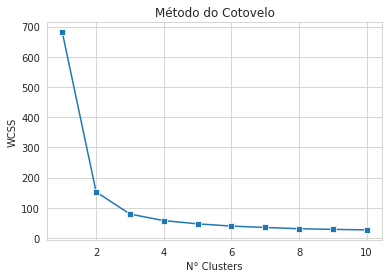

In [9]:
# resposta da questão 3.2

# Criando o gráfico:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(x=range(1,11), y=wcss, marker="s", palette="bright")
  grafico.set(title='Método do Cotovelo', xlabel="N° Clusters", ylabel="WCSS")

**Decidindo o número final de Clusters:**

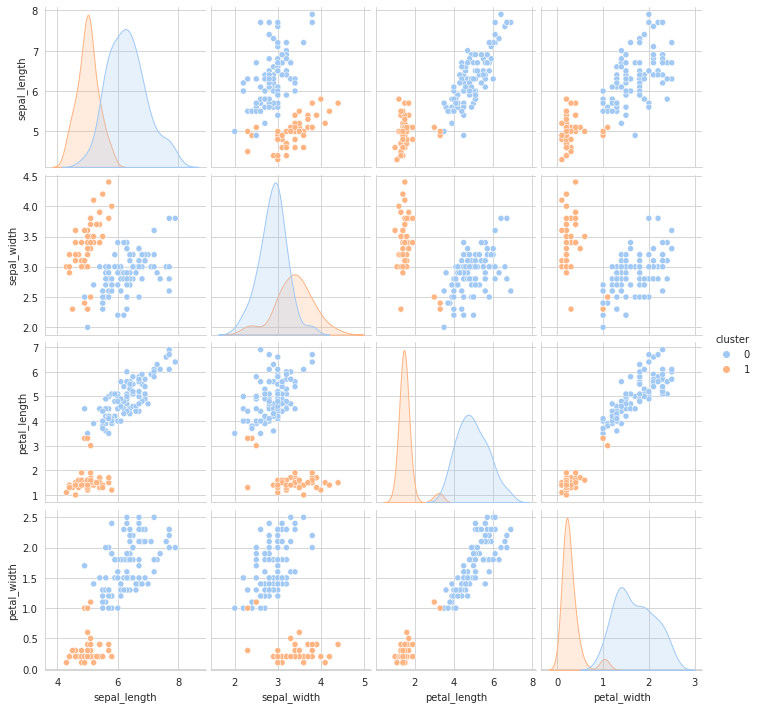

In [10]:
# trabalhando com 2 cluster:
model_test_2 = KMeans(n_clusters=2)
model_test_2  = model_test_2.fit(iris)
clusters = model_test_2.labels_
df = pd.concat(
    [iris,
    pd.DataFrame(clusters, columns=['cluster'])
    ], axis=1)

# Gerando o gráfico:
with sns.axes_style('whitegrid'):
 grafico = sns.pairplot(
 data=df,
 hue='cluster',
 palette="pastel"
 )

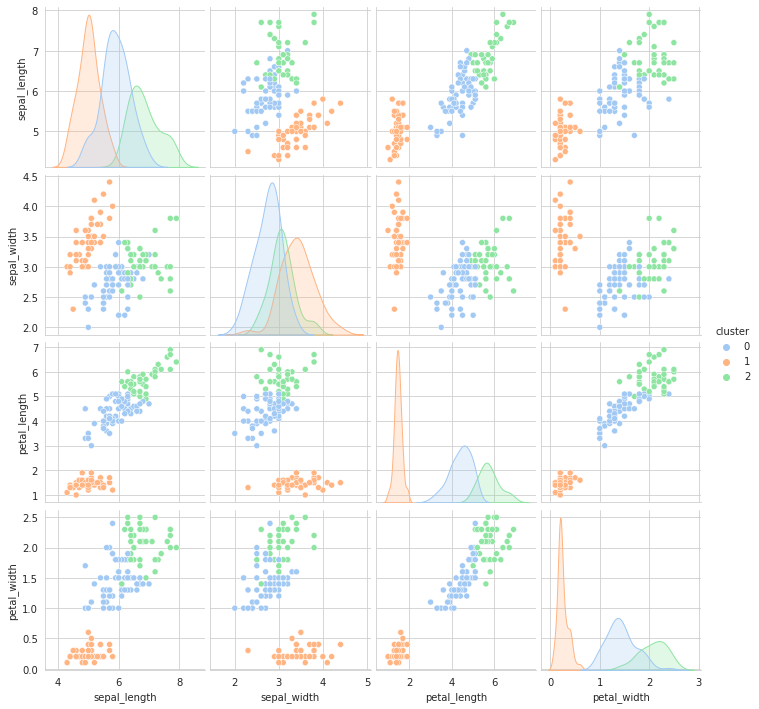

In [11]:
# trabalhando com 3 cluster:
model_test_3 = KMeans(n_clusters=3)
model_test_3 = model_test_3.fit(iris)
clusters = model_test_3.labels_
df = pd.concat(
    [iris,
    pd.DataFrame(clusters, columns=['cluster'])
    ], axis=1)

# Gerando o gráfico:
with sns.axes_style('whitegrid'):
 grafico = sns.pairplot(
 data=df,
 hue='cluster',
 palette="pastel"
 )

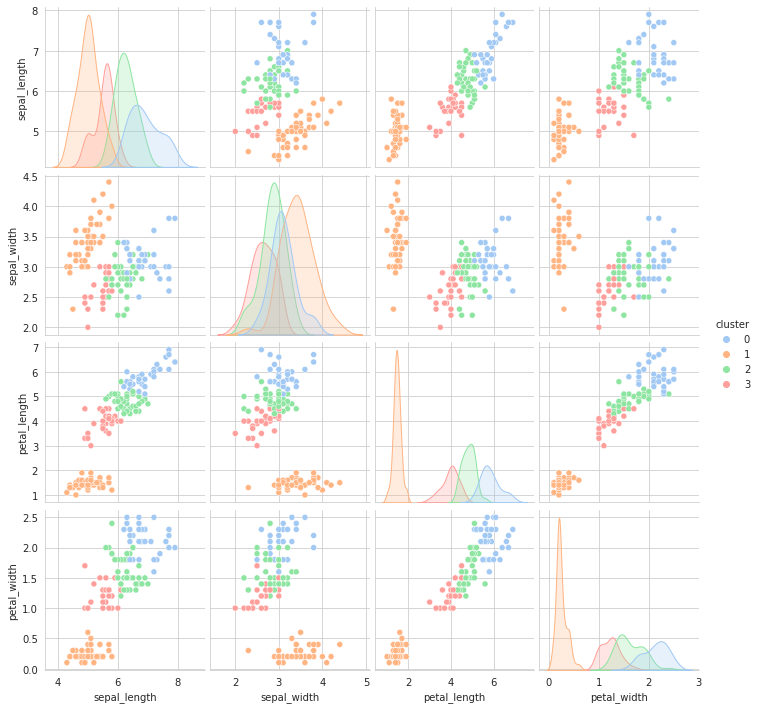

In [12]:
# trabalhando com 4 cluster:
model_test_4 = KMeans(n_clusters=4)
model_test_4 = model_test_4.fit(iris)
clusters = model_test_4.labels_
df = pd.concat(
    [iris,
    pd.DataFrame(clusters, columns=['cluster'])
    ], axis=1)

# Gerando o gráfico:
with sns.axes_style('whitegrid'):
 grafico = sns.pairplot(
 data=df,
 hue='cluster',
 palette="pastel"
 )

Conforme observação dos gráficos acima, a organização com **3 cluster** é mais fácil a sua compreensão na divisão dos grupos.

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [13]:
# resposta da questão 3.3.a
# número final com 3 clusters.
# testando o modelo:
model = KMeans(n_clusters=3)
model = model.fit(iris)
# Posição dos clusters:
clusters = model.labels_
# Adicionado a coluna clusters ao DataFrame iris:
iris = pd.concat(
    [iris,
    pd.DataFrame(clusters, columns=['cluster'])
    ], axis=1)



**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

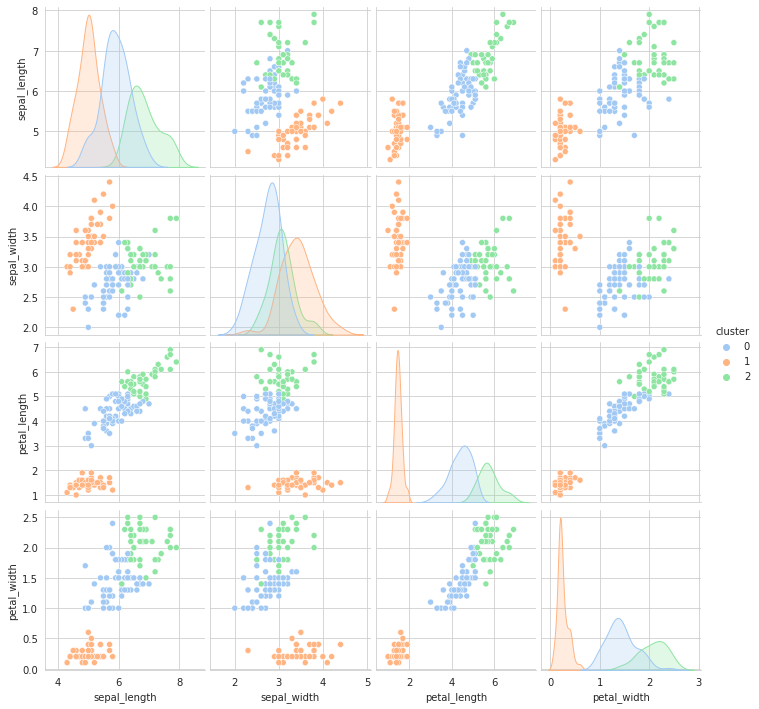

In [14]:
# resposta da questão 3.3.b

# Gerando o gráfico:
with sns.axes_style('whitegrid'):
 grafico = sns.pairplot(data=iris, hue='cluster', palette="pastel")

**Comentário:** Observando o gráfico acima, é possível interpretar que o conjunto  das flores pertencentes ao cluster 0, tem largura e comprimento das pétalas e sépalas como medianas.

Já o conjunto de flores pertencentes ao cluster 1, apresentam comprimento e largura das pétalas como pequenas. Mas, o comprimento das suas sépalas são descritas como pequenas, e a sua largura como sendo de tamanho médio para grande.

Por fim, o conjunto de flores do cluster 2, apresentam comprimento e largura das pétalas e sépalas como sendo de tamanhos grandes.

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [15]:
# resposta da questão 4.1
# Criando o dataframe (obs: foi criado o dataframe com 3 linhas repetidas devido exigência do modelo):
flor = pd.DataFrame({'sepal_length':5.1,'sepal_width':3.5,'petal_length':1.4,'petal_width':0.2}, index=[0,0,0]) 
model = model.fit(flor)
cluster = model.labels_
print(f'A flor se enquadra no cluster: {cluster[0]}')


A flor se enquadra no cluster: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


---